##Project Objective :
Create a model to predict house prices in Ames, Lowa, USA, using a machine learning model

##Business Understanding :
*   The real estate industry is one of the industries with
unpredictable price movements. Therefore, a system is needed to provide price recommendations based on certain criteria and data.

*   It is important to determine the price of a house using a system because currently, the price is usually determined using only traditional methods that are not based on comprehensive data.

*   Machine learning with the regression method is needed because the dependent variable, namely the house price, is continuous and not categorical data.

##Import & Data Understanding:

In [ ]:
#library for data analysis (work with structured data)
import pandas as pd
import numpy as np
#for graphic/model
import seaborn as sns
import matplotlib.pyplot as plt

#transforming raw data into format that suitable for machine learning algorithms
from sklearn.preprocessing import LabelEncoder

In [ ]:
#import and read data train and test
train="/content/drive/MyDrive/Colab Notebooks/Data Housing Project/train.csv"
test="/content/drive/MyDrive/Colab Notebooks/Data Housing Project/test.csv"
df_train=pd.read_csv(train)
df_test=pd.read_csv(test)

In [ ]:
#Checking Total Row and Column for both data
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

In [ ]:
#check the first five data points
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#details information about data type
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##Cleaning Data
*   Check Missing Value
*   Check Duplicated Data
*   Check Outlier & Find Correlation



In [ ]:
#Check Duplicated data + remove (if available)
df_train.duplicated()
df_train.duplicated().sum()

0

In [ ]:
#Check spread of numeric data
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_train_num=df_train.select_dtypes(include=[np.number]).columns
df_train_num

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
num_string_columns=df_train.select_dtypes(include=['int64']).columns.tolist()
#listing the numeric data and how many times appears
for num in num_string_columns :
  print(f'Value Numeric{num}:')
  print(df_train[num].value_counts())
  print('\n')

Value NumericId:
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64


Value NumericMSSubClass:
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


Value NumericLotArea:
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64


Value NumericOverallQual:
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


Value NumericOverallCond:
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


Value NumericYearBuilt:
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1


In [ ]:
num_string_columns=df_train.select_dtypes(include=['int64']).columns.tolist()
#Data Display for Each Parameter with Numerical Data
with pd.option_context('display.max_rows',None,'display.max_columns',None):
  print(df_train[num_string_columns].describe())

                Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   443.639726    46.549315   567.240411   
std      30.202904     20.645407   456.098091   161.319273   441.866955   
min    1872.000

In [ ]:
#count total number of missing value
null_number=df_train.isnull().sum()
#count percentage of missing values in each columns
null_percentage=df_train.isnull().sum()/len(df_train)*100

In [ ]:
#create a summary of null data
null_number=df_train.isnull().sum()
#count percentage of missing values in each columns
null_percentages=df_train.isnull().sum()/len(df_train)*100
df_train_summary_numericnull=pd.concat([null_number,null_percentages],axis=1,keys=['Times Null Appear','Percentage Null'])
#Display entire null percentage & number
with pd.option_context('display.max_rows',None,'display.max_columns',None):
  print(df_train_summary_numericnull)

               Times Null Appear  Percentage Null
Id                             0         0.000000
MSSubClass                     0         0.000000
MSZoning                       0         0.000000
LotFrontage                  259        17.739726
LotArea                        0         0.000000
Street                         0         0.000000
Alley                       1369        93.767123
LotShape                       0         0.000000
LandContour                    0         0.000000
Utilities                      0         0.000000
LotConfig                      0         0.000000
LandSlope                      0         0.000000
Neighborhood                   0         0.000000
Condition1                     0         0.000000
Condition2                     0         0.000000
BldgType                       0         0.000000
HouseStyle                     0         0.000000
OverallQual                    0         0.000000
OverallCond                    0         0.000000


##Treatment to Null Data :
*Less than 5%: Can usually be ignored, especially if the missing data is random.

*5-10%: Consider imputing the data.

*More than 10%: Consider deleting the affected columns or rows.

In [ ]:
#drop missing data more than 10%
threshold = [5,10]
def categorize_data (null_percentage,threshold):
  for value in null_percentage:
    if value >= threshold[1]:
      print(f"{value} - Drop Data")
    elif value <= threshold[0]:
      print (f"{value} - No Action")
    elif value >= threshold[0] and value <= threshold [1]:
      print(f"{value} - Need Imputation")

#df_train_drop_missing[6]=['Alley','Fence','FirePlaceQu','LotFrontage','MiscFeature','PoolQC']
#df_train_imputation[5]=['GarageCond','GarageCond','GarageQual','GarageType','GarageYrBlt']
#df_train_noAction[8+data_left]=['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','Electrical','MasVnrArea','MasVnrType']

In [ ]:
#List Dropped Features
filtered_df_drop = null_percentages[null_percentages >= 10]
filtered_df_drop.sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
LotFrontage    17.739726
dtype: float64

In [ ]:
total_in_filtered_data = filtered_df_drop.shape[0]
print(total_in_filtered_data)

6


In [ ]:
#List Should be Imputation
filtered_df_imput = null_percentages[(null_percentages <= 10) & (null_percentages >= 5)]
filtered_df_imput.sort_values(ascending=False)

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [ ]:
total_in_filtered_data = filtered_df_imput.shape[0]
print(total_in_filtered_data)

5


In [ ]:
#List No Action
filtered_df_noAction = null_percentages[null_percentages <= 5]
filtered_df_noAction.sort_values(ascending=False)

BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtCond        2.534247
BsmtFinType1    2.534247
BsmtQual        2.534247
                  ...   
BsmtFinSF1      0.000000
BsmtFinSF2      0.000000
MSSubClass      0.000000
TotalBsmtSF     0.000000
SalePrice       0.000000
Length: 70, dtype: float64

In [ ]:
total_in_filtered_data = filtered_df_noAction.shape[0]
print(total_in_filtered_data)

70


# Exploratory Data Analysis Process


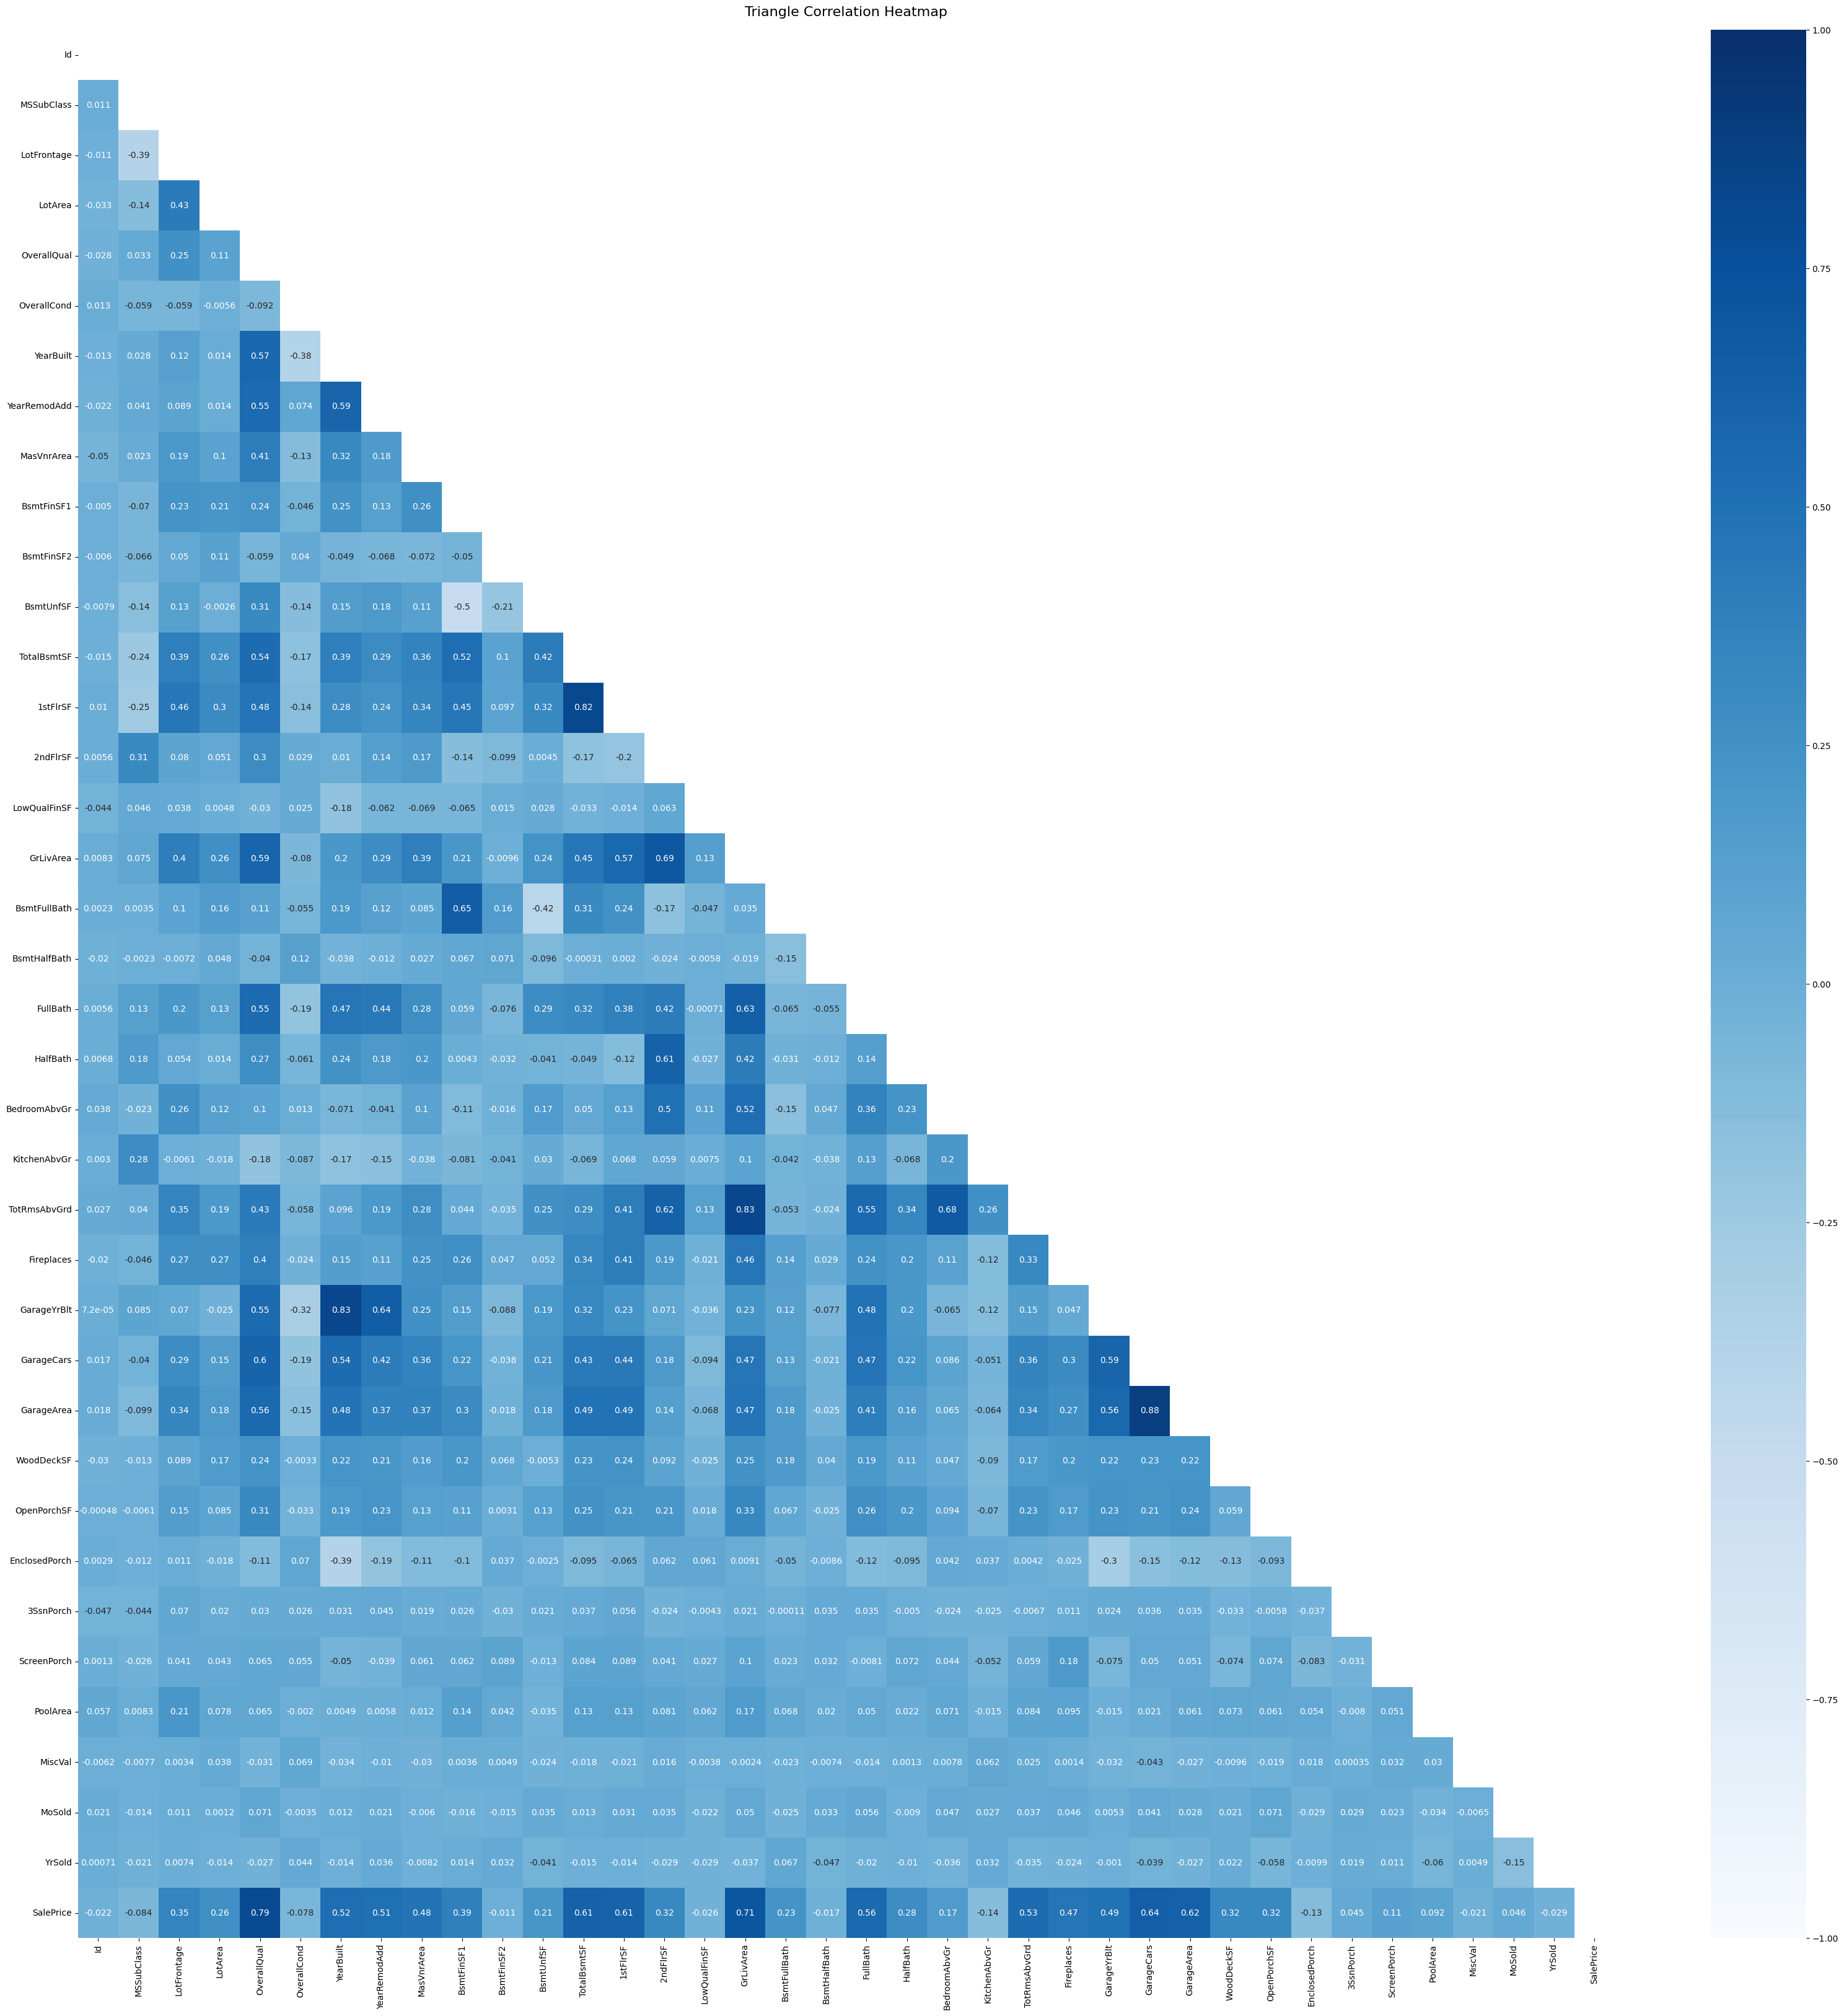

In [ ]:
df_train_num=df_train.select_dtypes(include=[np.number]).columns

#count correlation data within column
df_train_num_corr=df_train[df_train_num].corr()

#Create heatmap correlation for numeric data
plt.figure(figsize=(40,40)) #sets size 40x40
mask=np.triu(np.ones_like(df_train_num_corr,dtype=bool)) #create an upper triangle w array of boolean values (true=shown) (false=hidden)
heatmap=sns.heatmap(df_train_num_corr,mask=mask,vmin=-1,vmax=1,annot=True,cmap='Blues')
#visualizes using seaborn based on correlation matrix (triangular mask) and using color to represents correlations
#using annot to display numerical correlation values
heatmap.set_title('Triangle Correlation Heatmap',pad=16,fontdict={'fontsize':16})
plt.show()

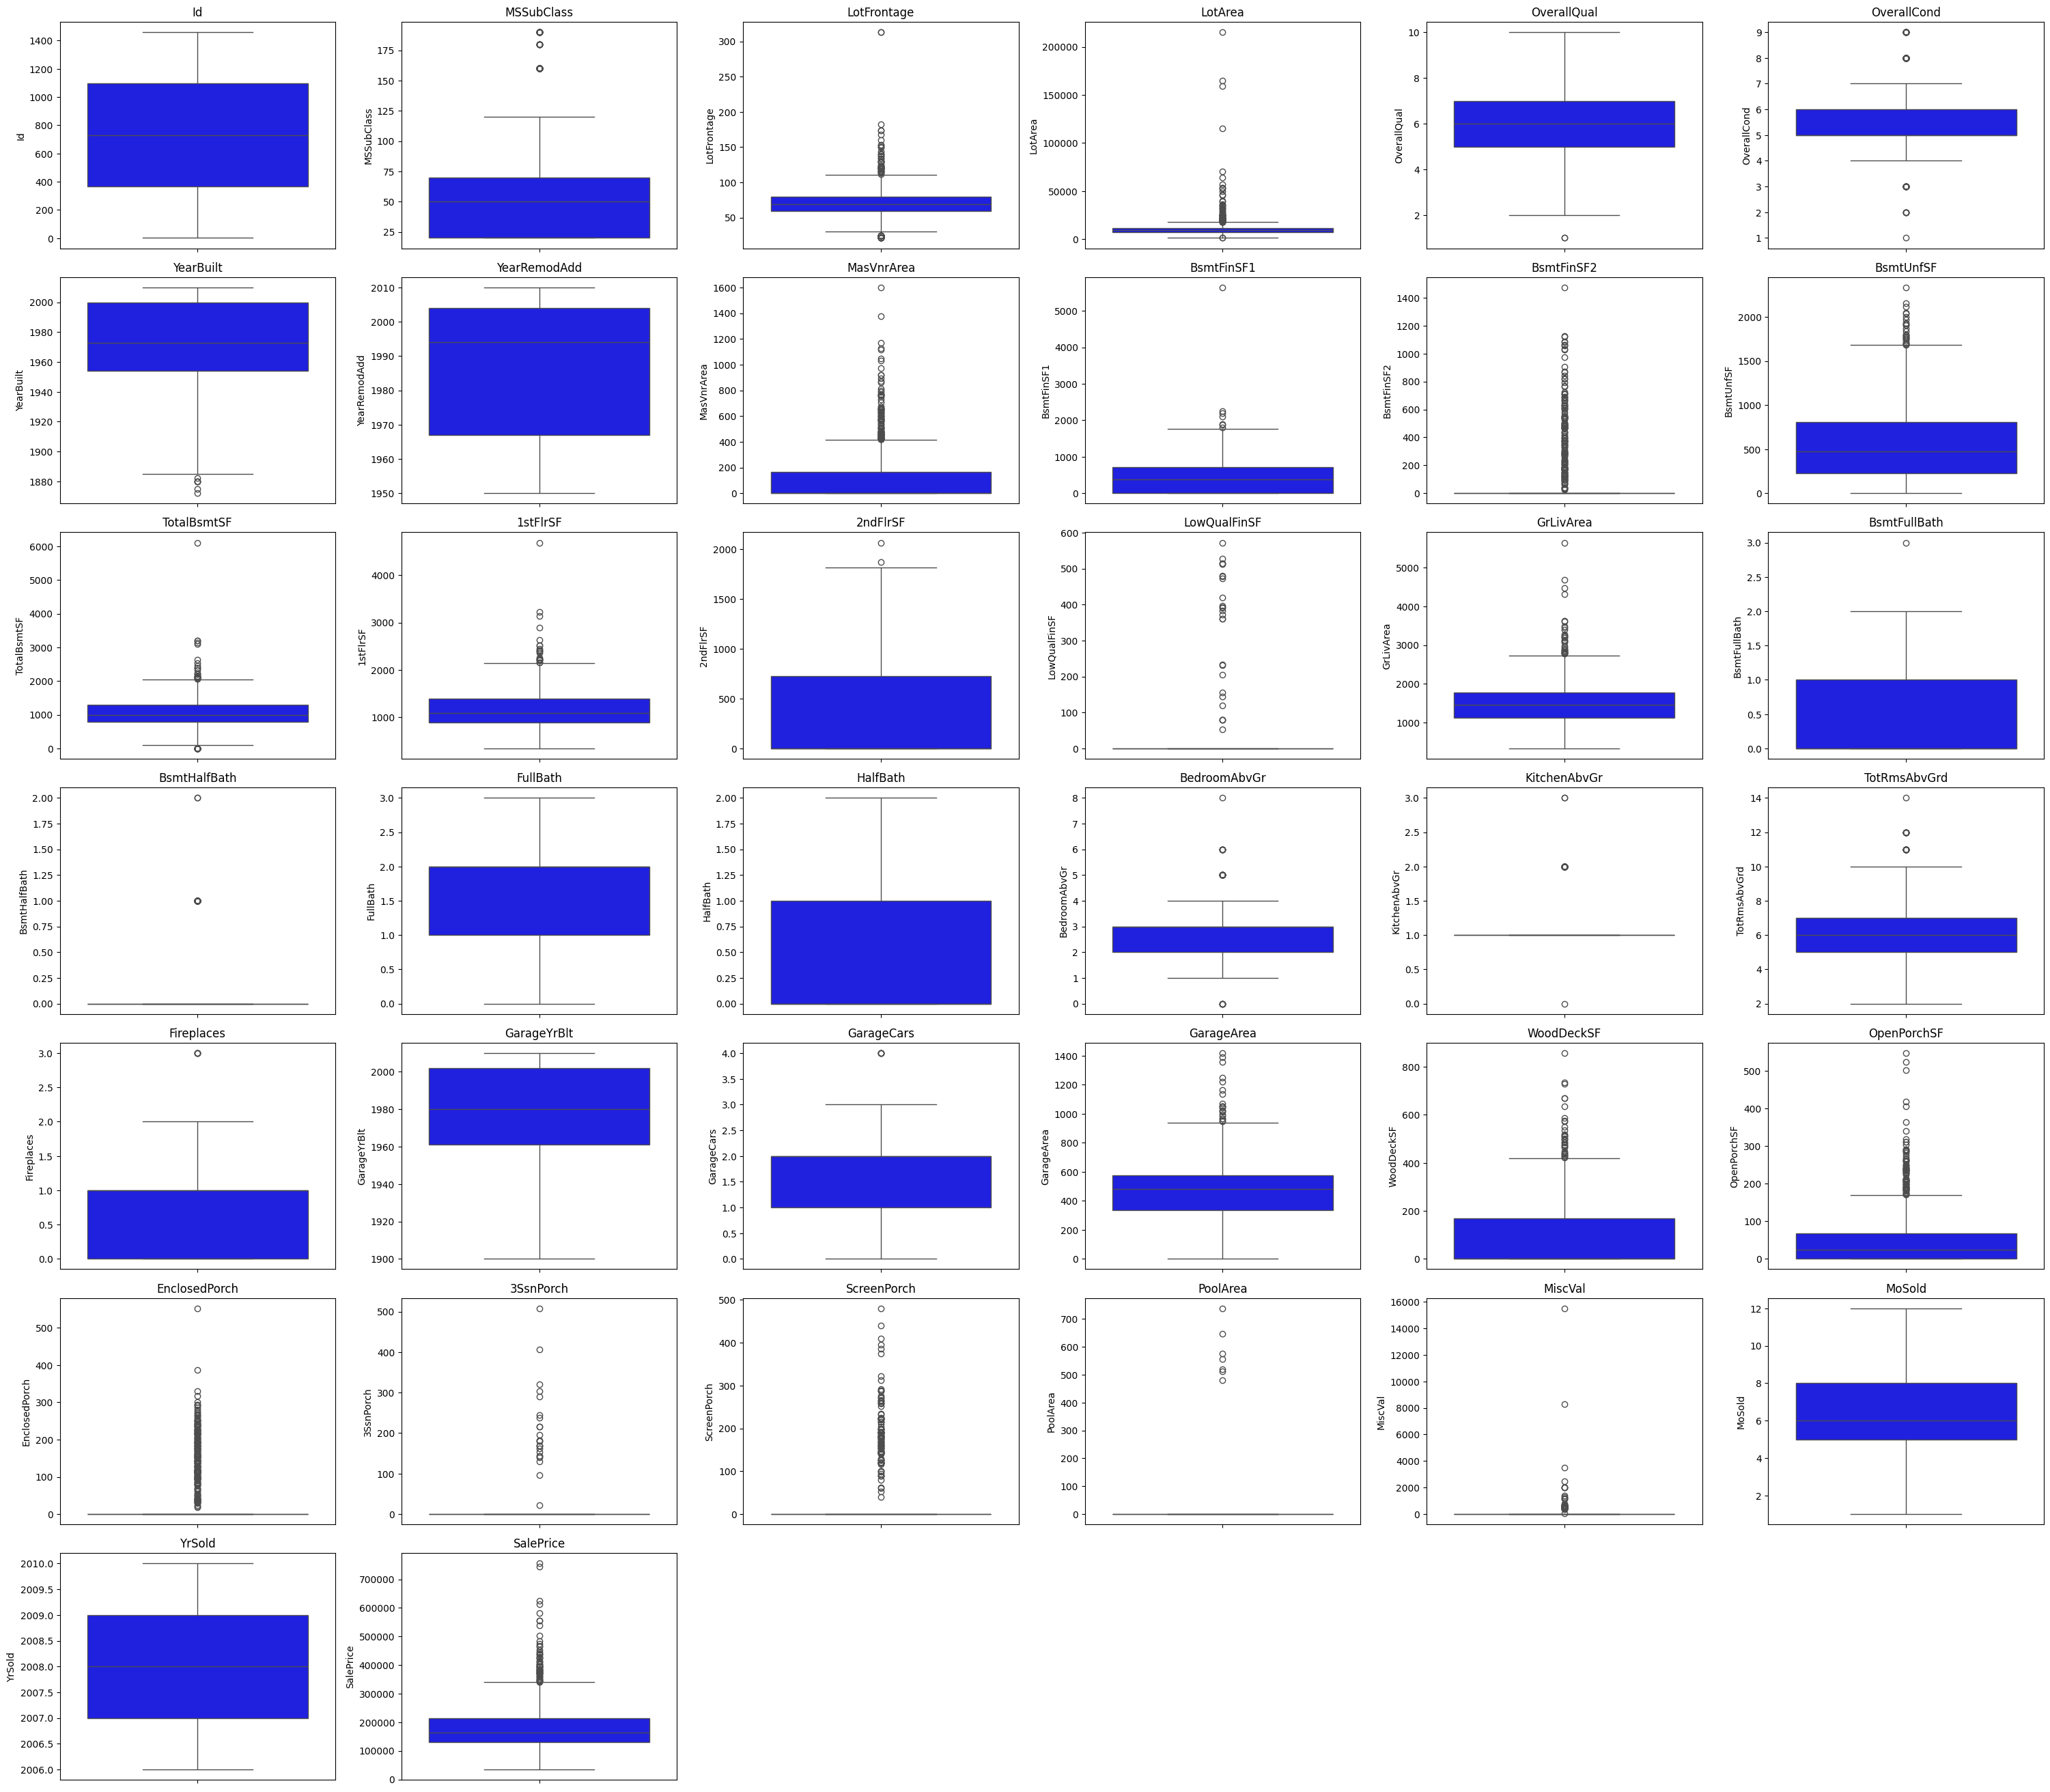

In [ ]:
#find an outlier
plt.figure(figsize=(30,30))
#takes an iterable list and return an enumerate object at index start from 1
for ind,featureEn in enumerate(df_train_num,start=1):
  plt.subplot(8,6,ind)#using 8 rows and 6 columns
  sns.boxplot(y=df_train[featureEn],color='Blue',orient='v')
  plt.title(featureEn)
plt.tight_layout()
plt.show()

In [ ]:
#show the correlation based on saleprice
df_train_num_corr[['SalePrice']].sort_values(by='SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Text(0.5, 1.0, 'Factors Affecting Sale Price')

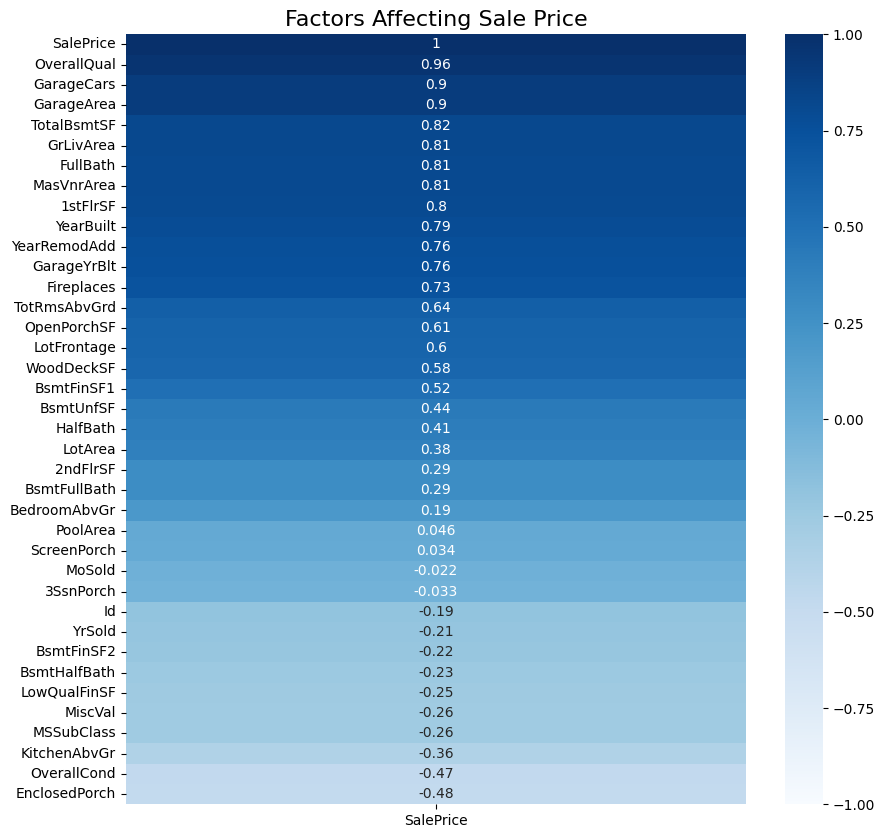

In [ ]:
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(df_train_num_corr.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False),vmin=-1,vmax=1,annot=True,cmap='Blues')
heatmap.set_title('Factors Affecting Sale Price',pad=6,fontdict={'fontsize':16})

#Analysis of Correlation Plot Against Target Feature

The correlation plot against the target in the above regression is used to see the relationship between one feature and the target feature, in this case "SalePrice".

Numbers close to 1 or -1 indicate a strong correlation, while numbers close to 0 have a weak correlation with the target. Features with weak correlation can be considered for dropping.

To simplify the features, correlations below 25% will be dropped.

Further Explanation:

* A correlation plot is a visualization that shows the relationship between two variables.
* The target feature is the variable that we want to predict in a regression model.
* Correlation is a measure of the relationship between two variables.
Correlation values range between -1 and 1.

A value of 1 indicates a strong positive correlation.
A value of -1 indicates a strong negative correlation.
A value of 0 indicates no correlation.

* Dropping these features with weak correlation can help improve the performance of the regression model.

In [ ]:
#List Dropped Features
filtered_df = df_train_num_corr[df_train_num_corr['SalePrice'] < 0.25]
filtered_df[['SalePrice']].sort_values(by='SalePrice', ascending=False)

,SalePrice
BsmtFullBath,0.227122
BsmtUnfSF,0.214479
BedroomAbvGr,0.168213
ScreenPorch,0.111447
PoolArea,0.092404
MoSold,0.046432
3SsnPorch,0.044584
BsmtFinSF2,-0.011378
BsmtHalfBath,-0.016844
MiscVal,-0.021190


#Conclusion:

Analyzing the correlation plot against the target feature helps in selecting important features for the regression model. Features with weak correlation to the target can be dropped to improve model performance.